# GDP Analysis of the Indian States

## Briefing

We are working as the chief data scientist at NITI Aayog, reporting to the CEO. The CEO has initiated a project wherein the NITI Aayog will provide top-level recommendations to the Chief Ministers (CMs) of various states, which will help them prioritise areas of development for their respective states. Since different states are in different phases of development, the recommendations should be specific to the states.

The overall goal of this project is to help the CMs focus on areas that will foster economic development for their respective states. Since the most common measure of economic development is the GDP, we will analyse the GDP of the various states of India and suggest ways to improve it.

## Understanding GDP

Gross domestic product (GDP) at current prices is the GDP at the market value of goods and services produced in a country during a year. In other words, GDP measures the 'monetary value of final goods and services produced by a country/state in a given period of time'.

GDP can be broadly divided into goods and services produced by three sectors: the primary sector (agriculture), the secondary sector (industry), and the tertiary sector (services).

It is also known as nominal GDP. More technically, (real) GDP takes into account the price change that may have occurred due to inflation. This means that the real GDP is nominal GDP adjusted for inflation. We will use the nominal GDP for this exercise. Also, we will consider the financial year 2015-16 as the base year, as most of the data required for this exercise is available for the aforementioned period.

## Per Capita GDP and Income

Total GDP divided by the population gives the per capita GDP, which roughly measures the average value of goods and services produced per person. The per capita income is closely related to the per capita GDP (though they are not the same). In general, the per capita income increases when the per capita GDP increases, and vice-versa. For instance, in the financial year 2015-16, the per capita income of India was ₹93,293, whereas the per capita GDP of India was $1717, which roughly amounts to ₹1,11,605.

## Reading and Understanding Data

In [1]:
# Import the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from functools import reduce
from itertools import cycle, islice
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [11.5,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

C:\Users\DEEPAK KAURA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


In [5]:
file = 'SGDP.csv'
dfx = pd.read_csv(file)
dfx.head(4)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0000,11063.0000,143175.0000,247144.0000,158074.0000,42367.0000,615606.0000,297539.0000,72720.0000,78254.0000,150918.0000,603778.0000,364048.0000,315561.0000,1272967.0000,12915.0000,19918.0000,7259.0000,11839.0000,227872.0000,266628.0000,436465.0000,11165.0000,751485.0000,359433.0000,19208.0000,724049.0000,115523.0000,NaN,3979.0000,18768.0000,343767.0000,16818.0000,8736039.0000
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0000,12547.0000,156864.0000,282368.0000,177511.0000,38120.0000,724495.0000,347032.0000,82820.0000,87105.0000,174724.0000,691700.0000,412313.0000,380924.0000,1448466.0000,13748.0000,21872.0000,8362.0000,13619.0000,258275.0000,297734.0000,494004.0000,12338.0000,855481.0000,401493.0000,21663.0000,822903.0000,131835.0000,NaN,4421.0000,21609.0000,391238.0000,18875.0000,9946636.0000
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0000,14602.0000,177745.0000,317101.0000,206690.0000,35921.0000,807623.0000,400662.0000,94764.0000,95893.0000,188567.0000,817886.0000,465041.0000,437737.0000,1647506.0000,16198.0000,22938.0000,10293.0000,16612.0000,291709.0000,334714.0000,549701.0000,13862.0000,971090.0000,452186.0000,25593.0000,944146.0000,149817.0000,NaN,5159.0000,24787.0000,443783.0000,21870.0000,11236635.0000
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0000,16761.0000,198098.0000,373920.0000,234982.0000,40633.0000,895027.0000,437462.0000,104369.0000,100404.0000,217107.0000,921788.0000,526002.0000,481982.0000,1792122.0000,18043.0000,24408.0000,11559.0000,18414.0000,321971.0000,368011.0000,612194.0000,15209.0000,1092564.0000,511178.0000,29667.0000,1043371.0000,161985.0000,NaN,5721.0000,27844.0000,492424.0000,24089.0000,12433749.0000


In [6]:
# shape of data

dfx.shape

(11, 36)

In [7]:
# Data description

dfx.describe()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
count,11.0000,9.0000,9.0000,9.0000,11.0000,9.0000,9.0000,11.0000,7.0000,9.0000,9.0000,9.0000,9.0000,11.0000,7.0000,7.0000,11.0000,7.0000,7.0000,11.0000,7.0000,7.0000,9.0000,11.0000,11.0000,7.0000,9.0000,9.0000,0.0000,7.0000,9.0000,11.0000,11.0000,11.0000
mean,280986.5618,8201.5167,100018.1678,181565.6733,120748.8791,22450.1200,448568.6744,228667.2718,50673.0643,53343.0011,108146.8078,451364.1022,261754.6678,254612.6664,880156.7586,8705.6671,13226.2927,5360.5143,8647.4086,165523.5182,181017.2914,298914.2600,7694.7744,565646.8409,268570.7873,13739.6914,520923.7189,82588.9478,NaN,2759.8143,13707.0022,258693.0045,12527.4355,6479952.4536
std,282573.5324,8073.2761,97589.4975,178700.4977,120928.4804,21443.4298,438025.6272,228195.8956,48384.1211,51712.6685,105639.9050,444821.6063,256167.6851,257221.1141,838823.0427,8298.6926,12892.7626,5180.5337,8338.9660,163258.5689,172158.2435,284618.5131,7451.9832,563615.7890,268734.5491,13240.7973,508728.8361,80553.8583,NaN,2627.0167,13399.0033,258176.5163,12445.8893,6433000.3626
min,8.4300,12.0700,9.5600,10.5900,10.9800,-10.0200,10.8200,9.1800,10.1400,4.7000,7.9200,11.4200,11.8500,10.1100,8.7800,6.4500,4.8700,12.3000,10.8500,6.1900,9.9500,11.2700,9.3900,10.4000,11.7000,12.7800,10.5100,8.1200,NaN,10.8900,8.8400,10.9600,10.1400,9.9900
25%,14.0250,14.7900,13.1900,14.2500,12.9950,10.7500,11.4700,14.1350,14.1550,11.3100,15.1400,14.5600,13.1100,16.3250,13.7650,14.6100,9.6950,19.1500,18.5050,11.9000,12.0450,12.2750,10.5100,13.0100,12.8400,17.0300,13.6500,13.6500,NaN,13.9050,14.7100,13.0950,11.8150,12.2450
50%,379402.0000,11063.0000,143175.0000,247144.0000,158074.0000,35921.0000,615606.0000,297539.0000,72720.0000,78254.0000,150918.0000,603778.0000,364048.0000,315561.0000,1272967.0000,12915.0000,19918.0000,7259.0000,11839.0000,227872.0000,266628.0000,436465.0000,11165.0000,751485.0000,359433.0000,19208.0000,724049.0000,115523.0000,NaN,3979.0000,18768.0000,343767.0000,16818.0000,8736039.0000
75%,495370.0000,14602.0000,177745.0000,317101.0000,220836.0000,40633.0000,807623.0000,419062.0000,88792.0000,95893.0000,188567.0000,817886.0000,465041.0000,459859.5000,1547986.0000,14973.0000,23673.0000,9327.5000,15115.5000,306840.0000,316224.0000,521852.5000,13862.0000,1031827.0000,481682.0000,23628.0000,944146.0000,149817.0000,NaN,4790.0000,24787.0000,468103.5000,22979.5000,11835192.0000
max,699307.0000,18784.0000,224234.0000,413503.0000,290140.0000,45002.0000,994316.0000,547396.0000,104369.0000,118387.0000,241955.0000,1027068.0000,588337.0000,640484.0000,1792122.0000,18043.0000,29567.0000,11559.0000,18414.0000,378991.0000,368011.0000,612194.0000,16637.0000,1338766.0000,654294.0000,29667.0000,1153795.0000,184091.0000,NaN,5721.0000,30304.0000,622385.0000,29557.0000,15251028.0000


In [8]:
# Data Information

dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Items  Description         11 non-null     object 
 1   Duration                   11 non-null     object 
 2   Andhra Pradesh             11 non-null     float64
 3   Arunachal Pradesh          9 non-null      float64
 4   Assam                      9 non-null      float64
 5   Bihar                      9 non-null      float64
 6   Chhattisgarh               11 non-null     float64
 7   Goa                        9 non-null      float64
 8   Gujarat                    9 non-null      float64
 9   Haryana                    11 non-null     float64
 10  Himachal Pradesh           7 non-null      float64
 11  Jammu & Kashmir            9 non-null      float64
 12  Jharkhand                  9 non-null      float64
 13  Karnataka                  9 non-null      float64
 

## Data Cleansing and Preparation

In [9]:
# Calculating the Missing Values % contribution in DF

df_null=dfx.isna().mean().round(4) * 100
df_null

Items  Description          0.0000  
Duration                    0.0000  
Andhra Pradesh              0.0000  
Arunachal Pradesh           18.1800 
Assam                       18.1800 
Bihar                       18.1800 
Chhattisgarh                0.0000  
Goa                         18.1800 
Gujarat                     18.1800 
Haryana                     0.0000  
Himachal Pradesh            36.3600 
Jammu & Kashmir             18.1800 
Jharkhand                   18.1800 
Karnataka                   18.1800 
Kerala                      18.1800 
Madhya Pradesh              0.0000  
Maharashtra                 36.3600 
Manipur                     36.3600 
Meghalaya                   0.0000  
Mizoram                     36.3600 
Nagaland                    36.3600 
Odisha                      0.0000  
Punjab                      36.3600 
Rajasthan                   36.3600 
Sikkim                      18.1800 
Tamil Nadu                  0.0000  
Telangana                   0.0000  
T

In [10]:
# Dropping columns where all rows are NaN

dfx1 = dfx.dropna(axis = 1, how = 'all')

In [11]:
# Dropping the data for Duration 2016-17 as it will not be used in Analysis

dfx2 = dfx1[dfx1.Duration != '2016-17']

In [12]:
# Dropping the UT as it is not needed for Analysis

dfx3 = dfx2.T
dfx4 = dfx3.drop(labels = ['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'])
#dfx3

In [13]:
# Mean of the row (% Growth over previous year) for duration 2013-14, 2014-15 and 2015-16

dfx4_mean = dfx4.iloc[2:,6:10].mean(axis = 1).round(2).sort_values()
dfx4_mean

Goa                 6.0300 
Meghalaya           6.9500 
Odisha              9.8400 
Sikkim              10.4900
Jammu & Kashmir     10.9000
Gujarat             11.1300
Punjab              11.1800
All_India GDP       11.2000
Maharashtra         11.2600
Rajasthan           11.3200
Jharkhand           11.5000
Uttarakhand         11.8000
Haryana             11.8500
Uttar Pradesh       11.9400
Himachal Pradesh    12.2800
Tamil Nadu          12.3400
Kerala              12.5800
Madhya Pradesh      12.6300
Assam               12.6500
Telangana           12.7600
Bihar               13.6000
Chhattisgarh        13.7000
Andhra Pradesh      14.0300
Karnataka           14.1200
Arunachal Pradesh   14.4100
Manipur             14.6100
Nagaland            16.4200
Tripura             17.0300
Mizoram             17.7000
dtype: float64

## Data Visualization

Text(0, 0.5, 'States')

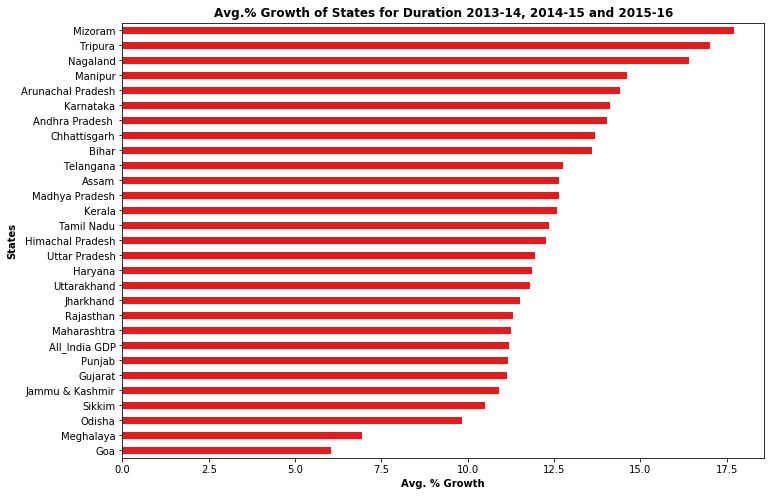

In [14]:
# Bar Plot for Average growth rates of the various states for duration 2013-14, 2014-15 and 2015-16
plt.rcParams['figure.figsize'] = [11.5,8]
dfx4_mean.plot(kind='barh',stacked=True, colormap = 'Set1')
plt.title("Avg.% Growth of States for Duration 2013-14, 2014-15 and 2015-16", fontweight = 'bold')
plt.xlabel("Avg. % Growth", fontweight = 'bold')
plt.ylabel("States", fontweight = 'bold')

### Insights from the above Plot considering the average growth rates of various states for duration 2013-2016


> 1) States like Mizoram, Nagaland,Tripura and Manipur which are parts of our Eastern India has been consistently growing fast      as compared to its peer states with avg growth rate of approx 15%.

> 2) Goa and Meghalaya are struggling to grow as compared to other states.

In [17]:
# Average growth rate of my home state against the National average Growth rate

dfx4_myhome = dfx4_mean[['Uttar Pradesh', 'All_India GDP']]

Text(0.5, 0, 'Home State Vs National Average')

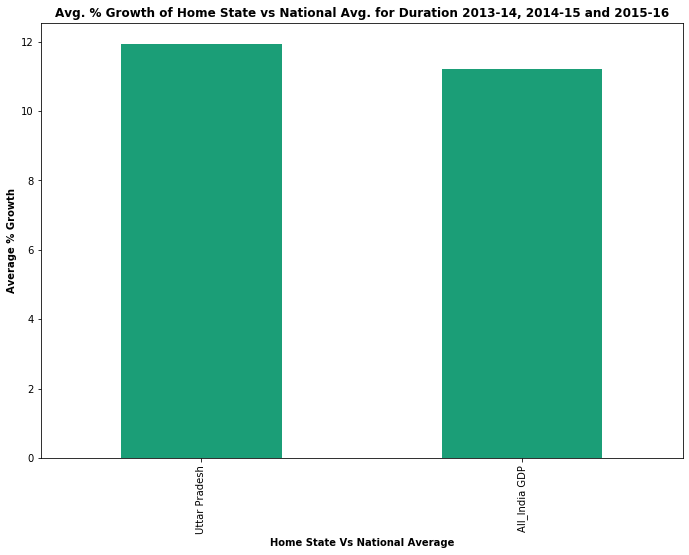

In [18]:
dfx4_myhome.plot(kind='bar',stacked=True, colormap = 'Dark2')
plt.title("Avg. % Growth of Home State vs National Avg. for Duration 2013-14, 2014-15 and 2015-16", fontweight = 'bold')
plt.ylabel("Average % Growth", fontweight = 'bold')
plt.xlabel("Home State Vs National Average", fontweight = 'bold')

### Insights from the above Plot considering the average growth rates of my Home state Vs National Average for      duration 2013-2016

>* Average growth rate of my home state Uttar Pradesh (12%) is greater than the National Average growth rate (10%).Performance     of my state is better as compared to most of rest states.

## Total GDP of the states for the year 2015-16

In [19]:
#Selecting the GSDP for year 2015-16

dfx5_total_gdp = dfx4.iloc[2:,4:5]

In [20]:
# Dropping the GSDP of All_India as it will not be included in the plot

dfx6_total_gdp = dfx5_total_gdp.drop(labels = ['All_India GDP'])

Text(0.5, 0, 'States')

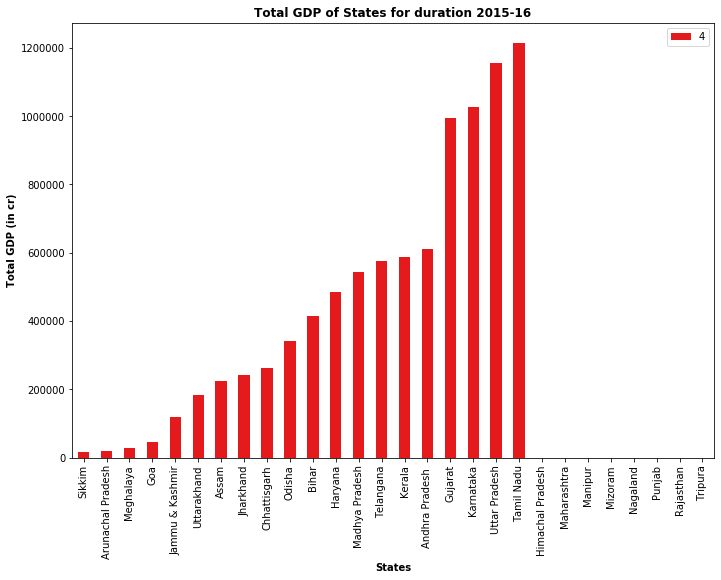

In [21]:
#Plot for GSDP of all states including States with NaN

dfx6_total_gdp.sort_values(by=4).plot(kind='bar',stacked=True, colormap = 'Set1')
plt.title("Total GDP of States for duration 2015-16" , fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')

In [22]:
# Dropping the States whose GSDP in NaN for year 2015-16

dfx7_total_gdp = dfx6_total_gdp.dropna().sort_values(by = 4)

Text(0.5, 0, 'States')

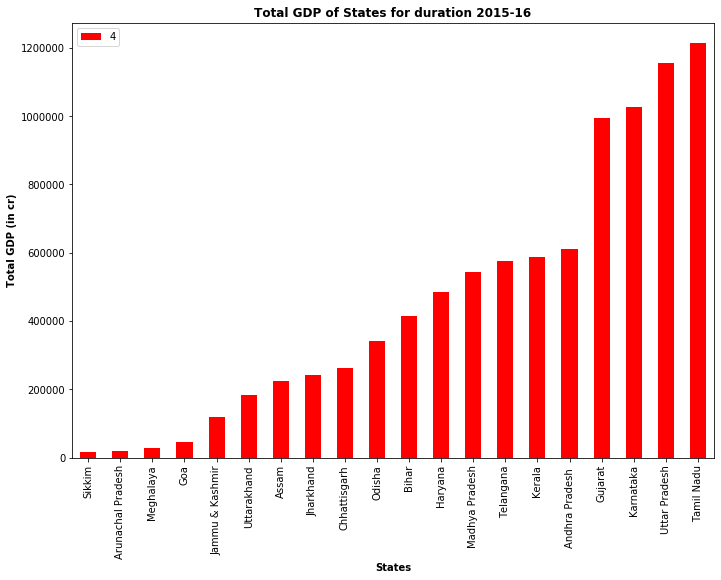

In [23]:
# Plot for GSDP of all states excluding States with NaN

dfx7_total_gdp.plot(kind='bar',stacked=True, colormap = 'autumn')
plt.title("Total GDP of States for duration 2015-16" , fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')

In [24]:
dfx7_total_gdp.shape

(20, 1)

### Insights from the above Plot considering the GSDP of various states for duration 2015-16


>  i)   GSDP of bigger states like TN and UP is higher as compared to smaller states like Sikkim and Arunachal Pradesh.*

>  ii)   GSDP of southern states like TN,Karnataka, Kerlala are better as compared to rest of the India.*

>  iii)   GSDP of most populous state Uttar Pradesh stands at position 2.

>  iv)   India's Silicon Valley Bangalore assisting Karnataka secure position 3.

Text(0.5, 0, 'States')

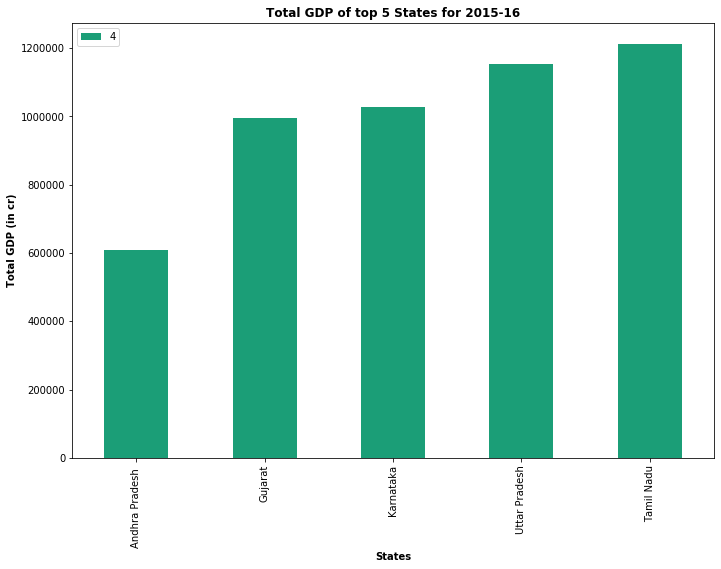

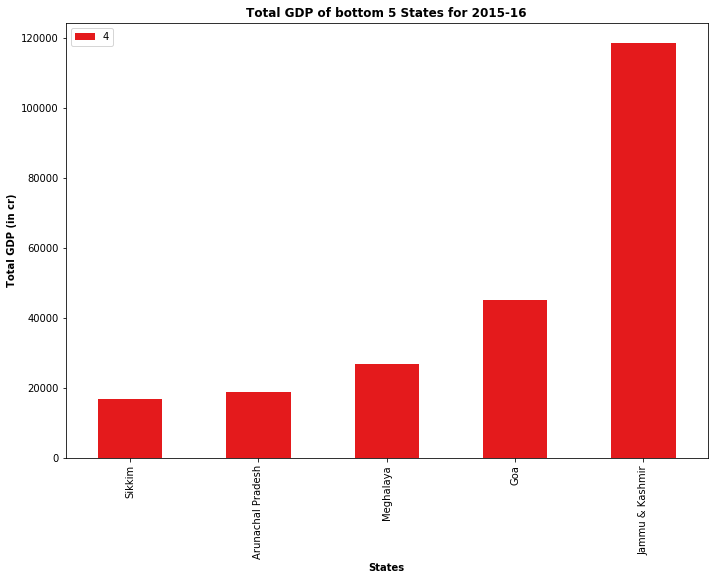

In [25]:
# GSDP of Top 5 States
dfx7_total_gdp.tail(5).plot(kind='bar',stacked=True, colormap = 'Dark2')
plt.title("Total GDP of top 5 States for 2015-16", fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')


# GSDP of Bottom 5 States
dfx7_total_gdp.head(5).plot(kind='bar',stacked=True, colormap = 'Set1')
plt.title("Total GDP of bottom 5 States for 2015-16", fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')

### Insights from the above Plot considering the GSDP of top/bottom 5 states for duration 2015-16


>* The top 5 states contributes almost 1/3 rd (32%) of total GSDP.

>* There is a significant difference in GSDP between the 5th(Andhra Pradesh) state and the rest of the top 5 states.

>* The bottom 5 states contributes only 1.5 % to total GSDP.

>* The GSDP of J&K is significantly higher than the rest of the bottom states reason being traditional recreational                tourism,a vast scope exists for adventure, pilgrimage, spiritual, and health tourism

## Reading the States GDP

In [30]:
# Reading all the csv files using glob functionality from a directory for further analysis

dir =  'N*.csv'

files = glob.glob(dir)

data = pd.DataFrame()

for f in files:
    dfs = pd.read_csv(f, encoding = 'unicode_escape')
    dfs['State'] = f.replace(path, '').replace('NAD-', '').replace('-GSVA_cur_2016-17.csv','').replace('-GSVA_cur_2015-16.csv','').replace('-GSVA_cur_2014-15.csv','').replace('_',' ')
    data = data.append(dfs)
data = data.iloc[:, ::-1]
sort=True

In [31]:
# Selecting the required columns for the Analysis

df = data[['State', 'Item', '2014-15']] 
df1 = df.reset_index(drop = True)

In [32]:
df1['Item'] = df1['Item'].map(lambda x: x.rstrip('*')).copy()
df1 = df1.set_index('State')

In [33]:
# Pivoting the df for enhanced analysis of data

df2 = pd.pivot_table(df1, values = '2014-15', index=['Item'], columns = 'State').reset_index()
df3 = df2.set_index('Item',drop=True)
#df3

In [34]:
# Dropping the UT as it will not be used in further analysis

df4=df3.drop(['Andaman Nicobar Islands','Chandigarh','Delhi','Puducherry'],axis=1)

## Plot the GDP per capita for all the states

In [35]:
df5_percapita = df4.loc['Per Capita GSDP (Rs.)'].sort_values()

Text(0, 0.5, 'States')

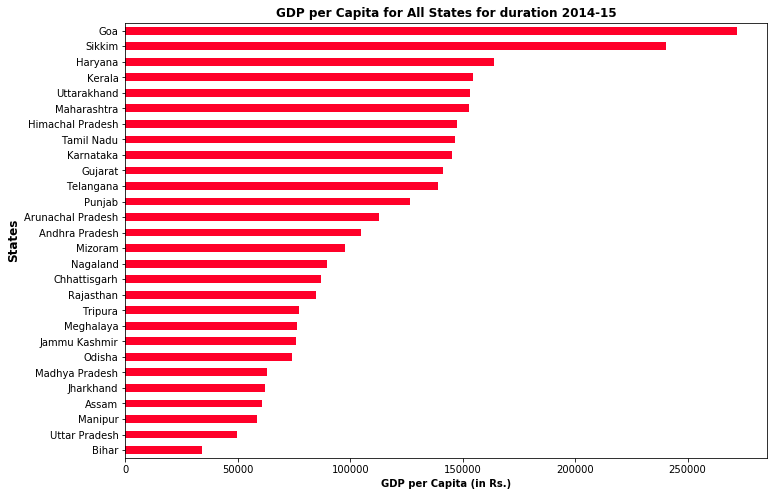

In [36]:
#Plot for GDP per capita in Rs. for all states

df5_percapita.plot(kind='barh',stacked=True, colormap = 'gist_rainbow')
plt.title("GDP per Capita for All States for duration 2014-15", fontweight = 'bold')
plt.xlabel("GDP per Capita (in Rs.)",fontweight = 'bold')
plt.ylabel("States", fontsize = 12, fontweight = 'bold')

Text(0.5, 0, 'States')

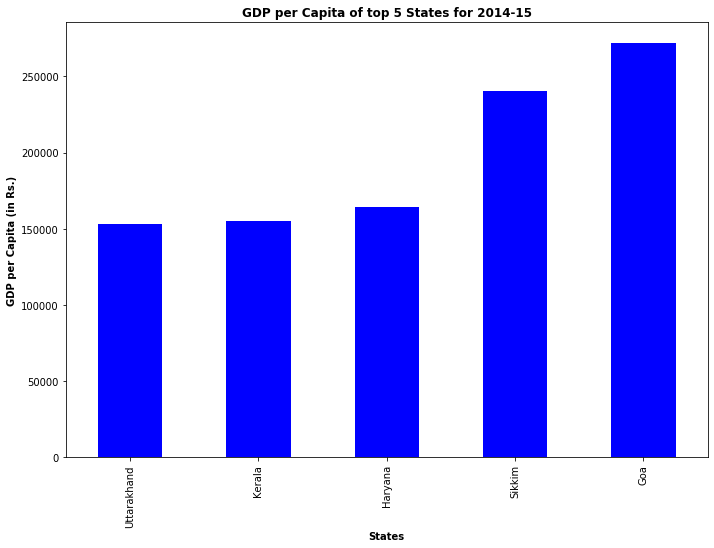

In [37]:
#Plot for GDP per Capita of top 5 States for 2014-15

df5_percapita.tail(5).plot(kind='bar',stacked=True, colormap = 'winter')
plt.title("GDP per Capita of top 5 States for 2014-15", fontweight = 'bold')
plt.ylabel("GDP per Capita (in Rs.)", fontweight = 'bold')
plt.xlabel("States", fontsize = 10, fontweight = 'bold')

Text(0.5, 0, 'States')

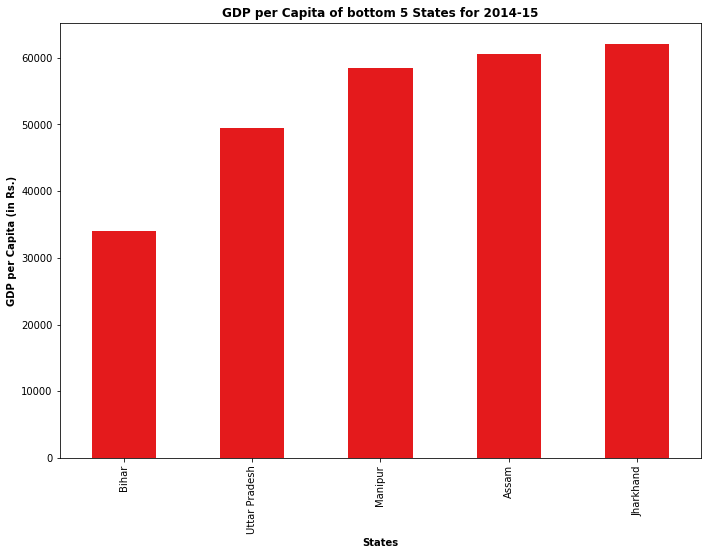

In [38]:
#Plot for GDP per Capita of bottom 5 States for 2014-15

df5_percapita.head(5).plot(kind='bar',stacked=True, colormap = 'Set1')
plt.title("GDP per Capita of bottom 5 States for 2014-15", fontweight = 'bold')
plt.ylabel("GDP per Capita (in Rs.)", fontweight = 'bold')
plt.xlabel("States", fontweight = 'bold')

In [39]:
Goa_percapita = (df5_percapita['Goa']/df5_percapita.sum()*100).round(2)
Goa_percapita1 = (df5_percapita['Goa']/df5_percapita.mean()).round(2)
Goa_per_Bihar =  df5_percapita['Goa']/df5_percapita['Bihar']
Sikkim_percapita = (df5_percapita['Sikkim']/df5_percapita.sum()*100).round(2)
Bihar_percapita = (df5_percapita['Bihar']/df5_percapita.sum()*100).round(2)
UP_percapita = (df5_percapita['Uttar Pradesh']/df5_percapita.sum()*100).round(2)

### Insights from the above Plot considering the per capita GSDP of various states for duration 2014-15¶

>  (I) Goa being at top of the chart contributes 8.5% in National per capita GSDP.

>  (II) Goa's per capita GSDP is almost 2.5 times the National average per capita GSDP.

>  (III) Goa's per capita GSDP is 8 times the poorest state Bihar per capita GSDP.

>  (IV) Bihar being at bottom of the chart contributes only 1% in National per capita GSDP.

>  (V) Sikkim’s economic development is based on advancement in tourism.

>  (VI) UP being the most populous state of India stands in bottom 2 of the chart.

>  (VII) Sikkim is doing exceptionally better as compared to her sister states.

In [40]:
# Ratio of the highest per capita GDP to the lowest per capita GDP

h_percapita = df5_percapita.iloc[-1]
l_percapita = df5_percapita.iloc[0]
percapita_ratio = (h_percapita/l_percapita).round(3)

percapita_ratio

8.005

The per capita ratio of highest per capita state to lowest per capita state is 8.005

### Percentage contribution of the Primary, Secondary and Tertiary sectors as a percentage of the total GDP for all the states

In [41]:
# Selecting Primary Secondary and Tertiary sector for percentage contribution in total GDP

df_gdp_con = df4.loc[['Primary', 'Secondary', 'Tertiary','Gross State Domestic Product']]
df_gdp_percon = (df_gdp_con.div(df_gdp_con.loc['Gross State Domestic Product'])*100).round(2)
df_gdp_percon =df_gdp_percon.T.iloc[:,:3]

Text(0.5, 0, 'States')

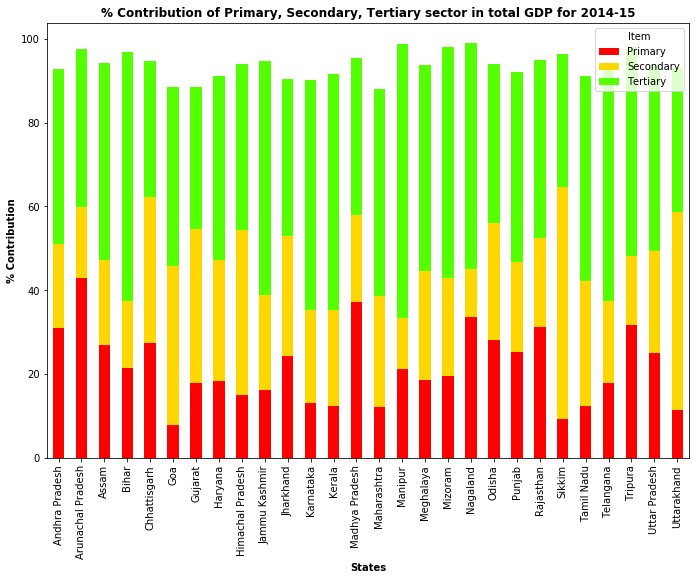

In [42]:
# Plot for % contribution of sectors in total GDP

df_gdp_percon.plot(kind='bar',stacked=True, colormap = 'prism')
plt.title("% Contribution of Primary, Secondary, Tertiary sector in total GDP for 2014-15",fontweight = 'bold')
plt.ylabel("% Contribution", fontweight = 'bold')
plt.xlabel("States", fontweight = 'bold')

### Insights from the above Plot considering the % Contribution of Primary, Secondary, Tertiary sector in total GDP for 2014-15

>* Tertiary sector contribution in each states total GSDP is higher as compared to Primary Sector.

>* For Manipur the % contribution by Tertiary sector is almost 65%.

>* For Sikkim the Primary sector contributes the least, Seconday sector contributes more than half in states total GSDP helping    it stand in toplist in terms of per capita GSDP.

>* For Goa Primary sector contributes the least and most of the contribution is from Primary and Secondary sector making it top    the percapita chart.

>* for MP the % contribution from each sector is balanced and hence helping in good GSDP.

>* The contribution from Seconday sector is balanced across all states its neither too high nor too less.

### Categorisation of states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest

In [43]:
# Sorting the df for better visualization

df_sort = df4.T.sort_values(by = 'Per Capita GSDP (Rs.)', ascending = False)

In [44]:
# Define the quantile values and bins for categorisation

df_sort.quantile([0.2,0.5,0.85,1], axis = 0)
bins = [0, 67385, 101332, 153064.85, 271793]
labels = ["C4", "C3", "C2", "C1"]
df_sort['Category'] = pd.cut(df_sort['Per Capita GSDP (Rs.)'], bins = bins, labels = labels)
df_index = df_sort.set_index('Category')
df_sum = df_index.groupby(['Category']).sum()
df_rename =  df_sum.rename(columns = {"Population ('00)" : "Population (00)"})

In [45]:
# Selecting the sub sectors which will be used for further analysis

df7_sector = df_rename[['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                 'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services',
                'Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']]

In [46]:
# Calculating and rounding the percentage contribution of each subsector in total GSDP

df8_per = (df7_sector.T.div(df7_sector.T.loc['Gross State Domestic Product'])*100)
df8_round = df8_per.round(2)
df9_per = df8_round.drop('Gross State Domestic Product')
df9_per

Category,C4,C3,C2,C1
Item,,,,
"Agriculture, forestry and fishing",24.3200,21.4200,14.2000,13.5400
Mining and quarrying,2.6100,6.9300,1.8600,0.7100
Manufacturing,10.7100,13.4900,17.3400,16.6100
"Electricity, gas, water supply & other utility services",1.8500,2.9900,2.3300,2.0600
Construction,9.7600,8.7400,7.0600,10.6700
"Trade, repair, hotels and restaurants",11.7800,10.2700,10.2300,13.3200
"Transport, storage, communication & services related to broadcasting",6.9400,5.8100,6.0600,6.6800
Financial services,3.2900,3.1300,6.0700,3.6600
"Real estate, ownership of dwelling & professional services",10.3700,9.7200,15.3600,13.1800


Text(0, 0.5, '% Contribution')

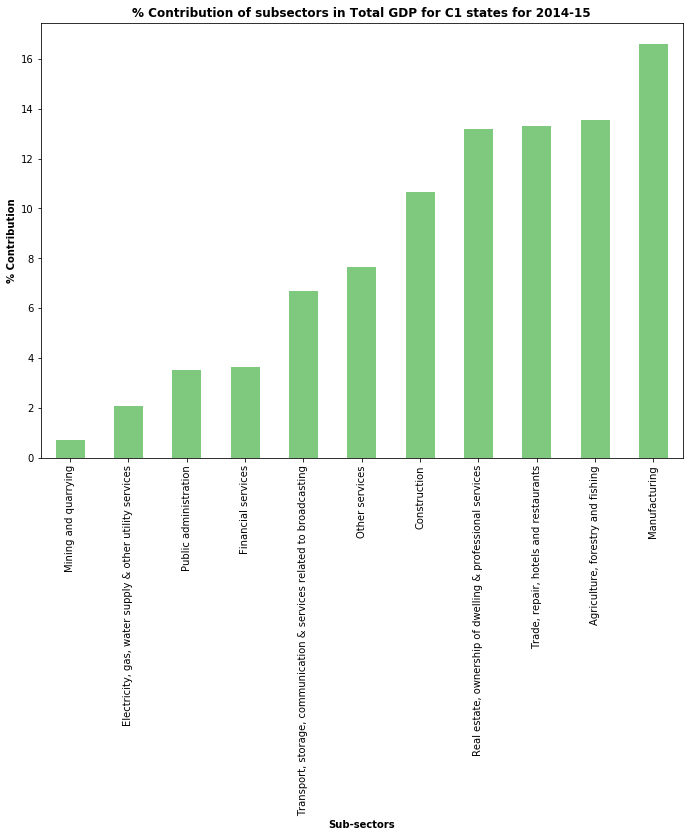

In [47]:
# Plot for % Contribution of subsectors in Total GDP for C1 states for 2014-15

df9_per['C1'].sort_values().plot(kind='bar',stacked=True, colormap = 'Accent')
plt.title("% Contribution of subsectors in Total GDP for C1 states for 2014-15", fontweight = 'bold')
plt.xlabel("Sub-sectors", fontweight = 'bold')
plt.ylabel("% Contribution", fontweight = 'bold')

Text(0.5, 0, 'Sub-sectors')

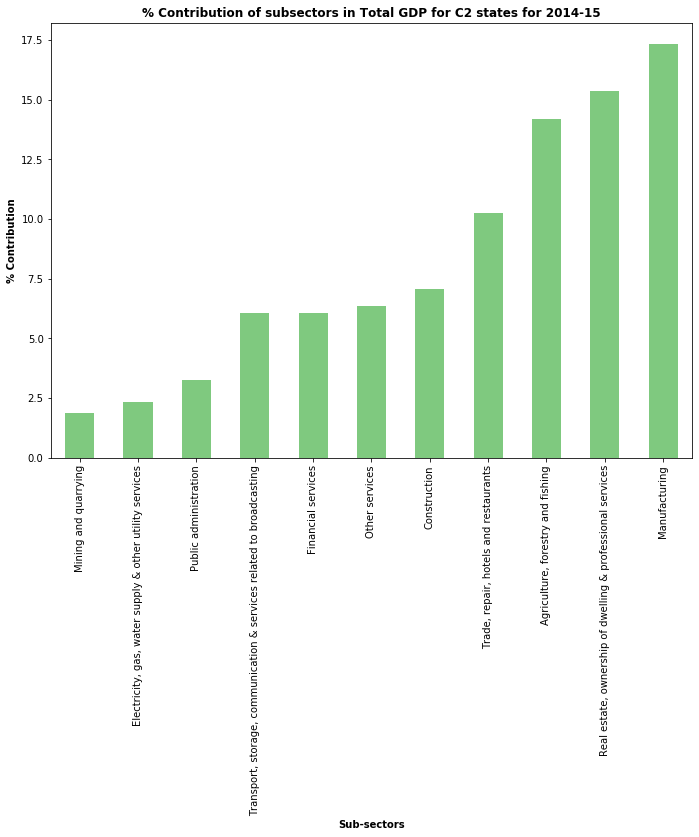

In [48]:
# Plot for % Contribution of subsectors in Total GDP for C2 states for 2014-15

df9_per['C2'].sort_values().plot(kind='bar',stacked=True, colormap = 'Accent')
plt.title("% Contribution of subsectors in Total GDP for C2 states for 2014-15", fontweight = 'bold')
plt.ylabel("% Contribution", fontweight = 'bold')
plt.xlabel("Sub-sectors", fontweight = 'bold')

Text(0.5, 0, 'Sub-sectors')

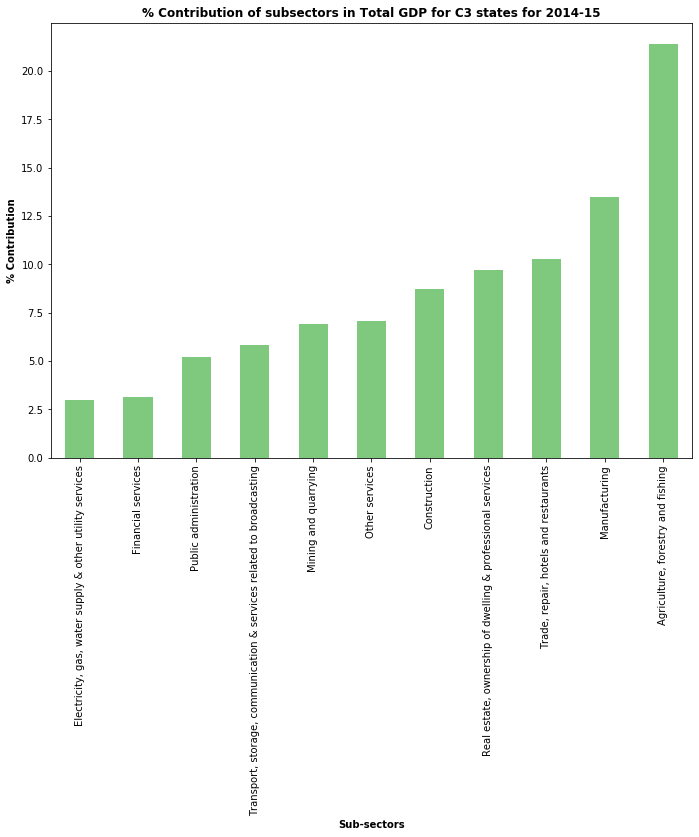

In [49]:
# Plot for % Contribution of subsectors in Total GDP for C3 states for 2014-15

df9_per['C3'].sort_values().plot(kind='bar',stacked=True, colormap = 'Accent')
plt.title("% Contribution of subsectors in Total GDP for C3 states for 2014-15", fontweight = 'bold')
plt.ylabel("% Contribution", fontweight = 'bold')
plt.xlabel("Sub-sectors", fontweight = 'bold')

Text(0.5, 0, 'Sub-sectors')

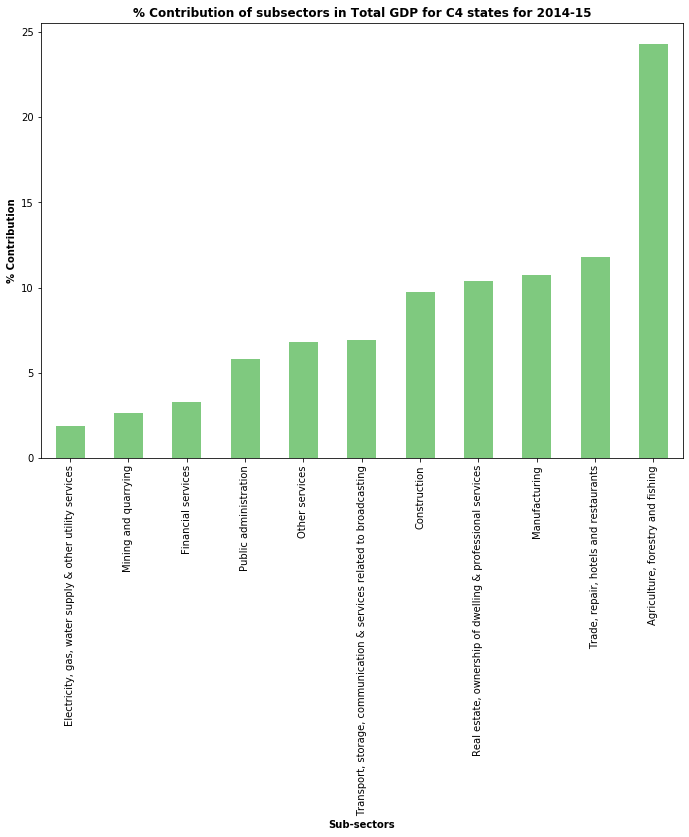

In [50]:
# Plot for % Contribution of subsectors in Total GDP for C4 states for 2014-15

df9_per['C4'].sort_values().plot(kind='bar',stacked=True, colormap = 'Accent')
plt.title("% Contribution of subsectors in Total GDP for C4 states for 2014-15", fontweight = 'bold')
plt.ylabel("% Contribution", fontweight = 'bold')
plt.xlabel("Sub-sectors", fontweight = 'bold')

### Plot for top 3/4/5/6 sub-sectors that contribute to approximately 80% of the GSDP of each category.

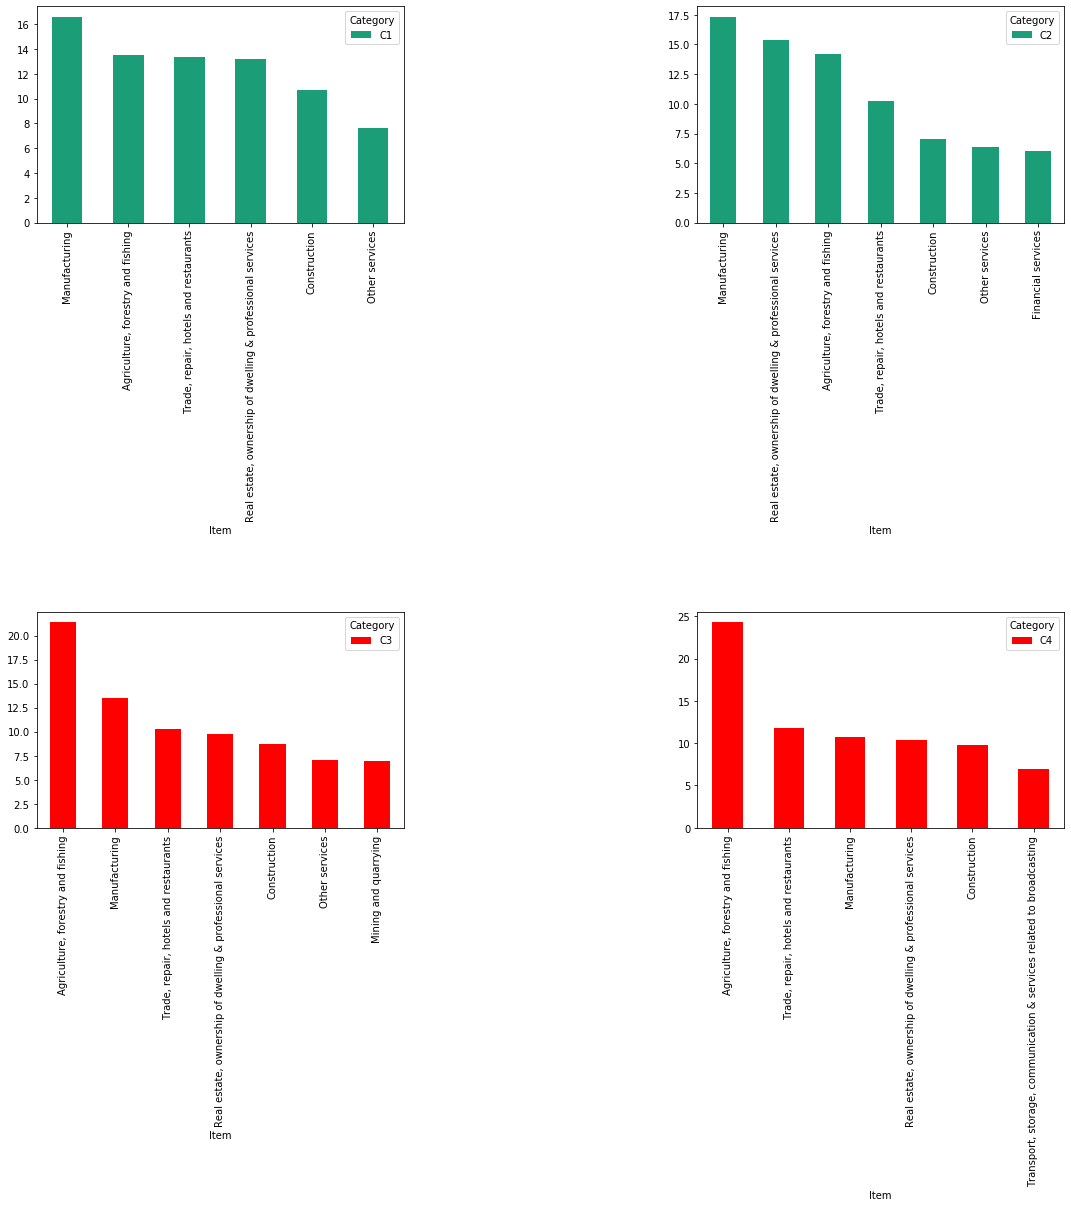

In [51]:
# 80% Contribution by top subsectors in Total GSDP for C1/C2/C3/C4 States 2014-15

fig, axes = plt.subplots(2,2, figsize=(15,12))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=1.8)

df9 = df9_per.sort_values(by = ['C1', 'C2', 'C3', 'C4'], ascending = False)
topsubsector = df9[df9.C1.cumsum() <= 80]
top_c1 = topsubsector[['C1']]
top_c1.plot(kind='bar',stacked=True, colormap = 'Dark2',ax=axes[0][0])

df9 = df9_per.sort_values(by = ['C2', 'C3', 'C4','C1'], ascending = False)
topsubsector = df9[df9.C2.cumsum() <= 80]
top_c2 = topsubsector[['C2']]
top_c2.plot(kind='bar',stacked=True, colormap = 'Dark2',ax=axes[0][1])


df9 = df9_per.sort_values(by = ['C3', 'C4','C1','C2'], ascending = False)
topsubsector = df9[df9.C3.cumsum() <= 80]
top_c3 = topsubsector[['C3']]
top_c3.plot(kind='bar',stacked=True, colormap = 'prism',ax=axes[1][0])

df9 = df9_per.sort_values(by = ['C4','C1','C2', 'C3'], ascending = False)
topsubsector = df9[df9.C4.cumsum() <= 80]
top_c4 = topsubsector[['C4']]
top_c4.plot(kind='bar',stacked=True, colormap = 'prism',ax=axes[1][1])

### Insights from the above Plot considering % contribution by top subsectors in Total GSDP for C1/C2/C3/C4 States for 2014-15

> * In C1, all sub sectors contribution is balanced as compared to the other categories.

> * Manufacturing is +vely correlated with high GDP.

> * Agriculture, Forest and Fishing is -vely correlated with high GDP

> * Majorly Manufacturing, Real States, Trades are driving all the categories, so if all the categories (C1, C2, C3, C4) focus     on these, and it's being poitively correlated with high GDP, it's contibution to total GDP will be more.

> * Recommendations (sectors need to improve on):

           C1 - (Mining, Financial)
   
           C2 - (Mining, Construction)
   
           C3 - (Manufacturing, Real Estates, Financial Services)
   
           C4 - (Manufacturing, Real Estates)

## GDP and Education Dropout Rates Relationship

In [52]:
# Reading the relevant file on which Analysis needs to be done

file1 =  'Dropout rate dataset.csv'
df_dropout = pd.read_csv(file1)

In [53]:
# Renaming the columns which are incorrect

df_rename = df_dropout.rename(columns = {'Primary - 2014-2015' : 'Primary - 2013-2014','Primary - 2014-2015.1' : 'Primary - 2014-2015'})

In [55]:
# Selecting the columns which will be used for further analysis

dfa = df_rename[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']] 

In [56]:
# Dropping the union territory because it will not be used in further analysis

dfa1 = dfa.drop([0,5,7,8,9,18,26,35,36])
dfa2 = dfa1.reset_index(drop=True)

In [57]:
# Calculating the Missing Values % contribution in DF

dfa2.isna().mean().round(2) * 100

Level of Education - State   0.0000 
Primary - 2014-2015          11.0000
Upper Primary - 2014-2015    7.0000 
Secondary - 2014-2015        0.0000 
dtype: float64

In [58]:
# Selecting the required column for further analysis

dfa3 = df4.T.reset_index()
dfa4 = dfa3[['State', 'Per Capita GSDP (Rs.)']]

In [59]:
# Concatenating the Education dropout df and Per Capita of States df

dfa5 = pd.concat([dfa2, dfa4], axis = 1)
dfa6 = dfa5.drop(['State'], axis = 1) 
dfa7 = dfa6.set_index('Level of Education - State', drop = True)

### Correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state

Text(0.5, 0, 'Secondary Education')

<Figure size 828x576 with 0 Axes>

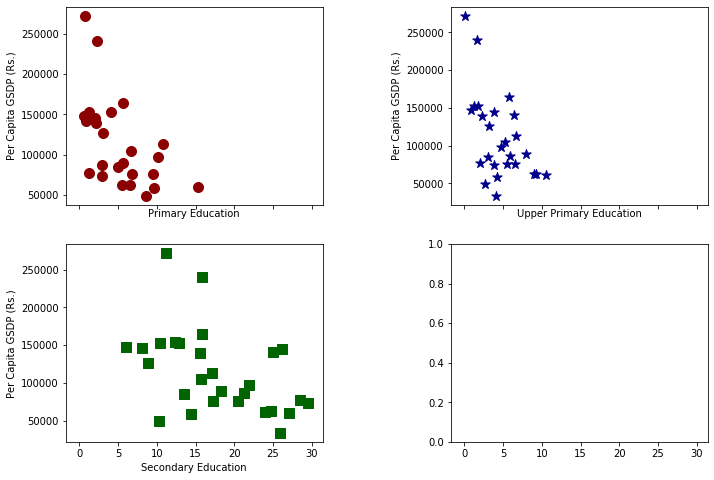

In [60]:
# Scatter Plot for GDP per capita with dropout rates in education

f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

sc = axes[0][0].scatter(dfa7['Primary - 2014-2015'],dfa7['Per Capita GSDP (Rs.)'], s=100, c='DarkRed',marker="o")
axes[0][0].set_ylabel('Per Capita GSDP (Rs.)')
axes[0][0].set_xlabel('Primary Education')

sc = axes[0][1].scatter(dfa7['Upper Primary - 2014-2015'],dfa7['Per Capita GSDP (Rs.)'], s=100, c='DarkBlue',marker="*")
axes[0][1].set_ylabel('Per Capita GSDP (Rs.)')
axes[0][1].set_xlabel('Upper Primary Education')

sc = axes[1][0].scatter(dfa7['Secondary - 2014-2015'],dfa7['Per Capita GSDP (Rs.)'], s=100, c='DarkGreen',marker="s")
axes[1][0].set_ylabel('Per Capita GSDP (Rs.)')
axes[1][0].set_xlabel('Secondary Education')

### Correlation of GDP per capita with dropout rates in Primary Education

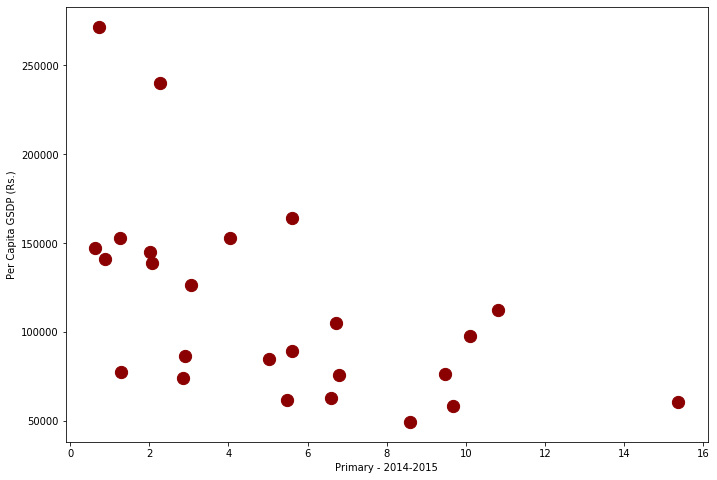

In [61]:
dfa7.plot(kind='scatter',x='Primary - 2014-2015',y='Per Capita GSDP (Rs.)', s=150, c='DarkRed',marker="o")

### Correlation of GDP per capita with dropout rates in Upper Primary Education

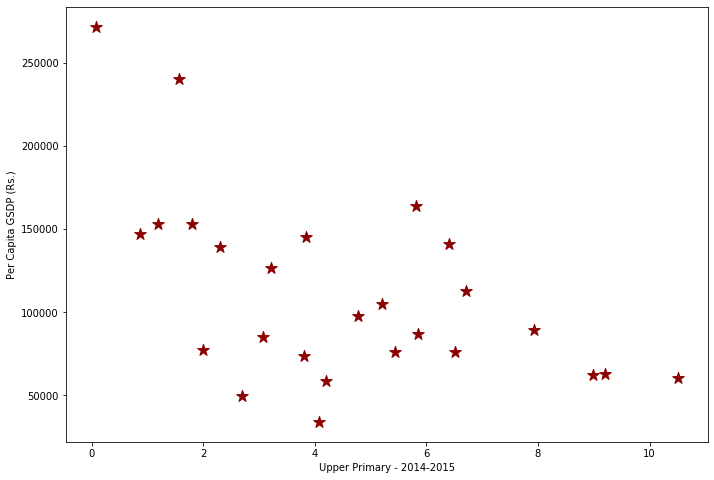

In [62]:
dfa7.plot(kind='scatter',x='Upper Primary - 2014-2015',y='Per Capita GSDP (Rs.)', s=150, c='DarkRed',marker="*")

### Correlation of GDP per capita with dropout rates in Secondary Education

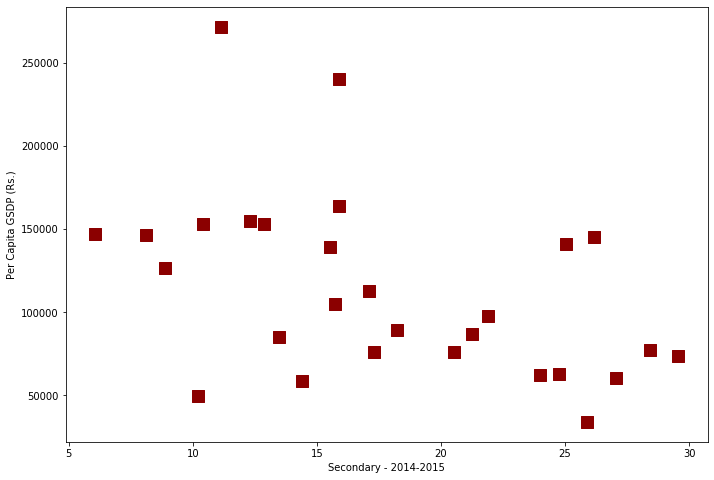

In [63]:
dfa7.plot(kind='scatter',x='Secondary - 2014-2015',y='Per Capita GSDP (Rs.)', s=150, c='DarkRed',marker="s")

## Insights from Correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015¶

> * Drop out rates are higher in Secondary Education.

> * Drop out rates for Primary and Upper Primary are less than or equal to 15.

> * Drop out rates for Secondary is generally above than 5.

> * Statistics for Primary and Upper Primary are pretty similar.

> * The outliers are due to Goa and Sikkim because of its Per Capita GDP.